<a href="https://colab.research.google.com/github/aysglgln/DNN_HA/blob/main/Denoiser_Example_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U denoiser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 858.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [ ]:
from IPython import display as disp
import torch
import torchaudio
from denoiser import pretrained
from denoiser.dsp import convert_audio

In [ ]:
# Downloading a test file
!wget https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp3

--2024-04-12 19:43:36--  https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp3
Resolving facebookresearch.github.io (facebookresearch.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to facebookresearch.github.io (facebookresearch.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339840 (332K) [audio/mp3]
Saving to: ‘alex_noisy.mp3’

alex_noisy.mp3      100%[===================>] 331.88K  --.-KB/s    in 0.03s   

2024-04-12 19:43:36 (9.62 MB/s) - ‘alex_noisy.mp3’ saved [339840/339840]



In [ ]:
model = pretrained.dns64().cuda()
wav, sr = torchaudio.load('alex_noisy.mp3')
wav = convert_audio(wav.cuda(), sr, model.sample_rate, model.chin)
with torch.no_grad():
    denoised = model(wav[None])[0]
disp.display(disp.Audio(wav.data.cpu().numpy(), rate=model.sample_rate))
disp.display(disp.Audio(denoised.data.cpu().numpy(), rate=model.sample_rate))

Downloading: "https://dl.fbaipublicfiles.com/adiyoss/denoiser/dns64-a7761ff99a7d5bb6.th" to /root/.cache/torch/hub/checkpoints/dns64-a7761ff99a7d5bb6.th
100%|██████████| 128M/128M [00:00<00:00, 196MB/s]


In [1]:
!git clone https://github.com/aysglgln/DNN_HA

Cloning into 'DNN_HA'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 23 (delta 6), reused 2 (delta 0), pack-reused 9
Receiving objects: 100% (23/23), 18.79 MiB | 19.53 MiB/s, done.
Resolving deltas: 100% (6/6), done.


# Yeni Bölüm

In [ ]:
output_file_name = "output.wav"

torchaudio.save(output_file_name,denoised.data.cpu(), sr)

Resampling to 20000.0Hz
Unprocessed stimulus level: 70.00 dB SPL
loading model from /content/DNN_HA/CNN-HA-12layers
1/1 [==============================] - 3s 3s/step
Processing time for 1 frames (337472 samples): 2.6559 s
CNN-HA-12layers: 72.34 dB SPL
Add PyOctaveBand.py to the directory to plot the frequency spectra of the stimuli!


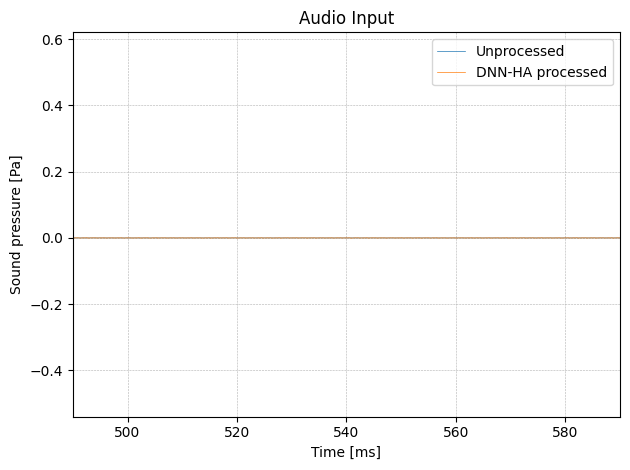

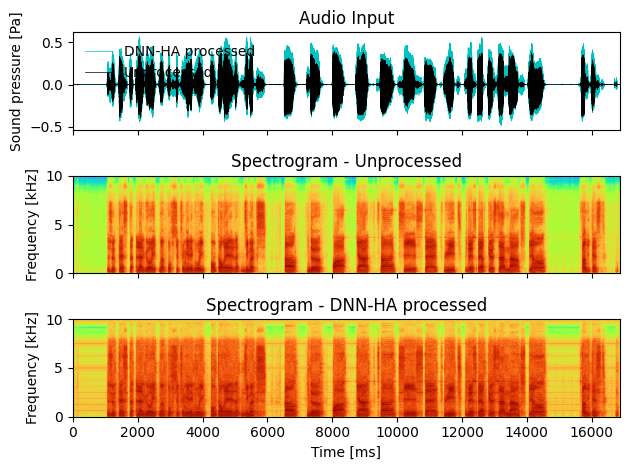

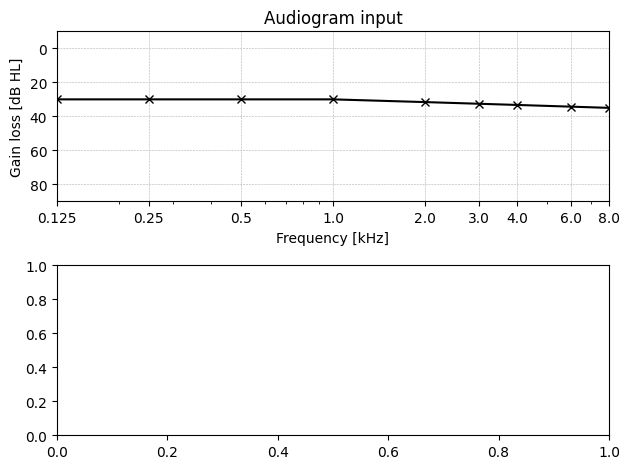

In [ ]:
from DNN_HA.test_module import run_dnn_test
modeldirs = [
'/content/DNN_HA/CNN-HA-12layers',
]

run_dnn_test(output_file_name, modeldirs)

In [ ]:
output_torch, output_sr = torchaudio.load("wavfiles/" + output_file_name.split(".")[0] + "_CNN-HA-12layers_20k.wav")

disp.display(disp.Audio(output_torch.numpy(), rate=output_sr))

In [ ]:
output_torch, output_sr = torchaudio.load("wavfiles/" + output_file_name.split(".")[0] + "_20k.wav")

disp.display(disp.Audio(output_torch.numpy(), rate=output_sr))